# Applied Mathematics 115: Mathematical Modeling  
---
*2024 Spring / Full Term*

**Meeting Time:**  
Tuesday 10:30 AM - 11:45 AM  
Thursday 10:30 AM - 11:45 AM
<br>
<br>

**Instructors:**  
*Michael P. Brenner* (Pierce Hall 313) brenner@seas.harvard.edu  
Francesco Mottes fmottes@seas.harvard.edu  

**Teaching Fellows:**  
Henry Bae henrybae@college.harvard.edu  
Sarah Martinson sarahmartinson@g.harvard.edu  
Shruti Sharma ssharma1@g.harvard.edu  
Al Shodiev alshodiev@college.harvard.edu  
Alex Sullivan alexsullivan@college.harvard.edu  
Matt Tibbitts mtibbitts@college.harvard.edu  





 # **Covid Data Visualization**

  In this notebook, we will use the available data to explore different aspects of the COVID 19 pandemic, including its epidemiology, effects on US mobility, and effects on the economy using these two datasets. Within the analysis, we will also examine outside sources to consider the outcomes of government policies.

  The aim is to let you explore different aspects of the data, including:
   * Epidemilogy
   * Mobility data (where people were and how often they went out)
   * Economics data, including spending by income bracket
   * Inequality

  This data is critical input to any model.  When looking through the data you should consider what is needed for modeling. Remember

  **the data you include is part of the model**

# **Part 1:** Initial Exploration of the Data

The data available for understanding COVID was unprecedented in scale and scope.  For this notebook, we are going to use a data compilation that Michael helped put together


One source that compiles the available data surrounding COVID 19 is found in a [Open-Covid-19 GitHub](https://github.com/GoogleCloudPlatform/covid-19-open-data) created by members of the a team at Google, as part of a general modeling project.  We stick with one dataset from this data: [Open-Covid-19 Data](https://github.com/GoogleCloudPlatform/covid-19-open-data), which contains datasets of daily time-series data related to COVID-19 for 50+ countries around the world. For most countries, the data is at the spatial resolution of states/provinces for most regions and at county/municipality resolution for Brazil, Chile, Colombia, United Kingdom, and USA. All regions are assigned a unique key, which resolves discrepancies between ISO / NUTS / FIPS codes, etc.

Another source focuses on the economic effects of the pandemic. Led by Harvard Professor Raj Chetty, the [Economic Tracker](https://tracktherecovery.org/) tracks the economic impacts of COVID-19 on people, businesses, and communities across the United States in real time.

Note: This data is incomplete due to the nature of the subject, as the data is a combination of biological, epidemiological, social, etc. data sources, which is imperfect by nature.

## Python Imports

In order to import the data, we will use a package called pandas, which is very useful to deal with big dataframes: [pandas](https://pandas.pydata.org/). Run this code to import the open-covid-19 dataset and the packages that help with plotting. This code block will import the packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 15})
import pandas as pd
pd.options.mode.chained_assignment = None

## Import the data

This takes a couple minutes to execute. While the code is executing, you will see a rotating circular section in place of the play button. Please allow this cell to finish running before running the next cell.


In [3]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN

data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v3/latest/aggregated.csv",
    keep_default_na=False,
    na_values=[""],
)

/var/folders/r6/kvqj3vvd2c5flbk5z3q26cth0000gq/T/ipykernel_15191/1881207075.py:4: DtypeWarning: Columns (203,204,205,206,207,208,209,210,211,212,254,259,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


The following blocks of code give examples of how this dataset looks and what components it contains:

Input a number of rows to see a random sample of the data. The rows correspond to a given country/subregion on a given date; the colums correspond to the different data collected.

In [4]:
number_of_rows =  3 #@param {type: "integer"}
data.sample(number_of_rows) # Samples rows randomly

,location_key,date,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,school_closing,workplace_closing,...,search_trends_visual_acuity,search_trends_vomiting,search_trends_wart,search_trends_water_retention,search_trends_weakness,search_trends_weight_gain,search_trends_wheeze,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn
10343,BR_PE_261370,2022-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,BR_PA_150390,2022-09-15,NaN,NaN,48.0,NaN,78.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21560,ES_CT_25909,2022-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#@markdown ###List the column headers
cols = data.columns
list(cols)

['location_key',
 'date',
 'mobility_retail_and_recreation',
 'mobility_grocery_and_pharmacy',
 'mobility_parks',
 'mobility_transit_stations',
 'mobility_workplaces',
 'mobility_residential',
 'school_closing',
 'workplace_closing',
 'cancel_public_events',
 'restrictions_on_gatherings',
 'public_transport_closing',
 'stay_at_home_requirements',
 'restrictions_on_internal_movement',
 'international_travel_controls',
 'income_support',
 'debt_relief',
 'fiscal_measures',
 'international_support',
 'public_information_campaigns',
 'testing_policy',
 'contact_tracing',
 'emergency_investment_in_healthcare',
 'investment_in_vaccines',
 'facial_coverings',
 'vaccination_policy',
 'stringency_index',
 'life_expectancy',
 'smoking_prevalence',
 'diabetes_prevalence',
 'infant_mortality_rate',
 'adult_male_mortality_rate',
 'adult_female_mortality_rate',
 'pollution_mortality_rate',
 'comorbidity_mortality_rate',
 'hospital_beds_per_1000',
 'nurses_per_1000',
 'physicians_per_1000',
 'health_

#### Prune the size of the data by cutting the number of columns

In [6]:
#@markdown Prune the size of the data by cutting down the number of columns
pruned_column_list=['location_key',
 'date',
 'country_code',
 'country_name',
 'subregion1_code',
 'subregion1_name',
 'subregion2_code',
 'subregion2_name',
 'locality_code',
 'locality_name',
 'aggregation_level',
 'human_capital_index',
 'hospital_beds_per_1000',
 'new_confirmed',
 'new_deceased',
 'new_recovered',
 'new_tested',
'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_recovered',
 'population',
 'population_male',
 'population_female',
 'population_density',
 'mobility_retail_and_recreation',
 'mobility_grocery_and_pharmacy',
 'mobility_parks',
 'mobility_transit_stations',
 'mobility_workplaces',
 'mobility_residential']
data=data[pruned_column_list]
data['key'] = data['location_key']
data['total_confirmed'] = data['cumulative_confirmed']
data['total_deceased'] = data['cumulative_deceased']
data['total_recovered'] = data['cumulative_recovered']

In [7]:
#@markdown List all country names and keys

# List the country names and keys
c = data[data.aggregation_level == 0]['country_name'].drop_duplicates()
k = data[data.aggregation_level == 0]['location_key'].drop_duplicates()
country_key = pd.concat([c, k], axis=1, sort=False)
print(country_key)

# # Retrieve a key from a country_name
# print('\n',country_key.loc[country_key['country_name'] == 'Germany'])

# # Retrieve a country_name from a key
# print('\n',country_key.loc[country_key['key'] == 'MG'])

# # List the subregions for a given country
# print('\n',data.loc[data['country_name'] == 'United States of America']['subregion1_name'].drop_duplicates()[1:])

                                       country_name location_key
0                              United Arab Emirates           AE
1                                       Afghanistan           AF
2                               Antigua and Barbuda           AG
3                                            Angola           AO
4                                         Argentina           AR
...                                             ...          ...
21594  South Georgia and the South Sandwich Islands           GS
22570                British Indian Ocean Territory           IO
22624                                Norfolk Island           NF
22695                        Svalbard and Jan Mayen           SJ
22709          United States Minor Outlying Islands           UM

[242 rows x 2 columns]


In [8]:
#@markdown List the subregions for a given country

country = 'Spain' #@param {type: "string"}
print('\n',data.loc[data['country_name'] == country]['subregion1_name'].drop_duplicates()[1:])


 2444               Andalucía
2445                  Aragón
2446                Asturias
2447               Cantabria
2448         Castilla y León
2449      Castilla-La Mancha
2450          Islas Canarias
2451                Cataluña
2453             Extremadura
2454                 Galicia
2455          Islas Baleares
2456        Region de Murcia
2457     Comunidad de Madrid
2458                 Navarra
2459              País Vasco
2460                La Rioja
2461    Comunidad Valenciana
7517                   Ceuta
7518                 Melilla
Name: subregion1_name, dtype: object


In [9]:
#@markdown List all region names and keys

c = data[data.aggregation_level == 1]['subregion1_name'].drop_duplicates()
k = data[data.aggregation_level == 1]['location_key'].drop_duplicates()
region_key = pd.concat([c, k], axis=1, sort=False)
print(region_key)

# # Retrieve a key from a subregion1_name
# print('\n',region_key.loc[region_key['subregion1_name'] == 'Lombardy'])

# # Retrieve a subregion1_name from a key
# print('\n',region_key.loc[region_key['key'] == 'PT_15'])

# List the subregions2 for a given subregion1_name
# print('\n',data.loc[data['subregion1_name'] == 'Massachusetts']['subregion2_name'].drop_duplicates()[1:])

             subregion1_name location_key
5                      Salta         AR_A
19     Buenos Aires Province         AR_B
149                 San Luis         AR_D
157               Entre Ríos         AR_E
174                 La Rioja         AR_F
...                      ...          ...
21069                    NaN         VE_F
21080                    NaN         VE_R
21086                    NaN         VE_Z
21262                    NaN        CU_03
22697                    NaN       TW_CYQ

[1431 rows x 2 columns]


In [10]:
#@markdown List the subregions for a given region name. These include the
#@markdown counties/municipalities resolution for Brazil, Chile, Colombia, United Kingdom, and USA.
#@markdown - The country filed should exactly match the string in the country_name column. If a given country does not have data broken down to the subregion, it will return a blank or empty Series.
#@markdown - For subregions with accents on letters, you must include those accents to get a match.
#@markdown > For example, Brazil has a subregion Pará. Entering Para will not return any further subregions, but entering Pará will return all the subregions of Pará.

region = 'Massachusetts' #@param {type: "string"}
print('\n',data.loc[data['subregion1_name'] == region]['subregion2_name'].drop_duplicates()[1:])


 5496    Barnstable County
5497     Berkshire County
5498       Bristol County
5499         Dukes County
5500         Essex County
5501      Franklin County
5502       Hampden County
5503     Hampshire County
5504     Middlesex County
5505     Nantucket County
5506       Norfolk County
5507      Plymouth County
5508       Suffolk County
5509     Worcester County
Name: subregion2_name, dtype: object


In [11]:
#@markdown List the counties names and keys

c = data[data.aggregation_level == 2]['subregion2_name'].drop_duplicates()
k = data[data.aggregation_level == 2]['location_key'].drop_duplicates()
county_key = pd.concat([c, k], axis=1, sort=False)
print(county_key.sample(10))

# Retrieve a key from a country_name
print('\n',county_key.loc[county_key['subregion2_name'] == 'Middlesex County'])

# Retrieve a country_name from a key
print('\n',county_key.loc[county_key['location_key'] == 'GB_WLS_W11000029'])

            subregion2_name  location_key
647                   Cairu  BR_BA_290540
16768         La Trinitaria  MX_CHP_07099
16028          West Jakarta    ID_JK_3173
6353                    NaN   US_OK_40001
10043  São João do Araguaia  BR_PA_150750
9289             Cana Verde  BR_MG_311190
7446                  Minas      AR_Q_077
12357            Etten-Leur    NL_NB_0777
11272         Mato Queimado  BR_RS_431217
1668          Felipe Guerra  BR_RN_240370

        subregion2_name location_key
4688  Middlesex County  US_CT_09007

         subregion2_name      location_key
15879  Cardiff and Vale  GB_WLS_W11000029


In [12]:
###COLAB VISUALIZATION

#@title **Key Finding Function** {display-mode: "form" }
#@markdown Input a country, region, or county/municipality name into the form to find the corresponding key. (Include capitalization.)
# Function that returns key if you put in country/region name
#Function the returns country/region name if you input key
#@markdown Examples: Madagascar, Lombardy, Arkansas, San Bernardino County

country_names = data[data.aggregation_level == 0]['country_name'].drop_duplicates()
country_k = data[data.aggregation_level == 0]['key'].drop_duplicates()
country_key = pd.concat([country_names, country_k], axis=1, sort=False)

region_names = data[data.aggregation_level == 1]['subregion1_name'].drop_duplicates()
region_k = data[data.aggregation_level == 1]['key'].drop_duplicates()
region_key = pd.concat([region_names, region_k], axis=1, sort=False)

subregion_names = data[data.aggregation_level == 2]['subregion2_name'].drop_duplicates()
subregion_k = data[data.aggregation_level == 2]['key'].drop_duplicates()
subregion_key = pd.concat([subregion_names, subregion_k], axis=1, sort=False)

location = 'Spain' #@param {type:"string"}
def key_finder(location):
  # if you input country name
  if location in list(country_key['country_name']):
     return(country_key.loc[country_key['country_name'] == location])
     #return('\n',country_names.loc[country_key['country_name'] == location])
  # if you input country code
  if location in list(country_key['key']):
    # print('\n',country_key.loc[country_key['key'] == location])
     return(country_names.loc[country_key['key'] == location])

  # if you input subregion1 name
  elif location in list(region_key['subregion1_name']):
     return(region_key.loc[region_key['subregion1_name'] == location])
     #return('\n', region_names.loc[region_key['subregion1_name'] == location])
     #return('\n',list(data.loc[data['subregion1_name'] == location]['subregion2_name'].drop_duplicates()[1:]))
  #if you input subregion1 key
  elif location in list(region_key['key']):
     #print('\n', region_key.loc[region_key['key'] == location])
     return('\n', region_names.loc[region_key['key'] == location])

  #if you input sugregion2 name
  elif location in list(subregion_key['subregion2_name']):
     return('\n', subregion_key.loc[subregion_key['subregion2_name'] == location])
     #print('\n', subregion_names.loc[subregion_key['subregion2_name'] == location])
  #if you input subregion2 key
  elif location in list(subregion_key['key']):
    #return('\n', subregion_key.loc[subregion_key['key'] == location])
     return(subregion_names.loc[subregion_key['key'] == location])
  else:
     print('There is no data on this specific location.')

print(key_finder(location))


     country_name key
2443        Spain  ES


Now that you are familiar with the data, move on to the Epidemiology section to start visualizing it.

# **Part 2**: Epidemiology


In this section, we will look at some epidemiological plots and learn how to compare data for different countries.

In [20]:
def get_outbreak_mask(data: pd.DataFrame, threshold: int = 10):
    ''' Returns a mask for > N confirmed cases '''
    return data['cumulative_confirmed'] > threshold

In [27]:
data_key = 'AR_B'
date_limit = '2020-05-31'
df = pd.read_csv(f'https://storage.googleapis.com/covid19-open-data/v3/location/{data_key}.csv').set_index('date')

In [28]:
df.columns

Index(['location_key', 'place_id', 'wikidata_id', 'country_code',
       'country_name', 'subregion1_code', 'subregion1_name',
       'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3', 'aggregation_level',
       ...
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'snowfall_mm', 'dew_point', 'relative_humidity'],
      dtype='object', length=186)

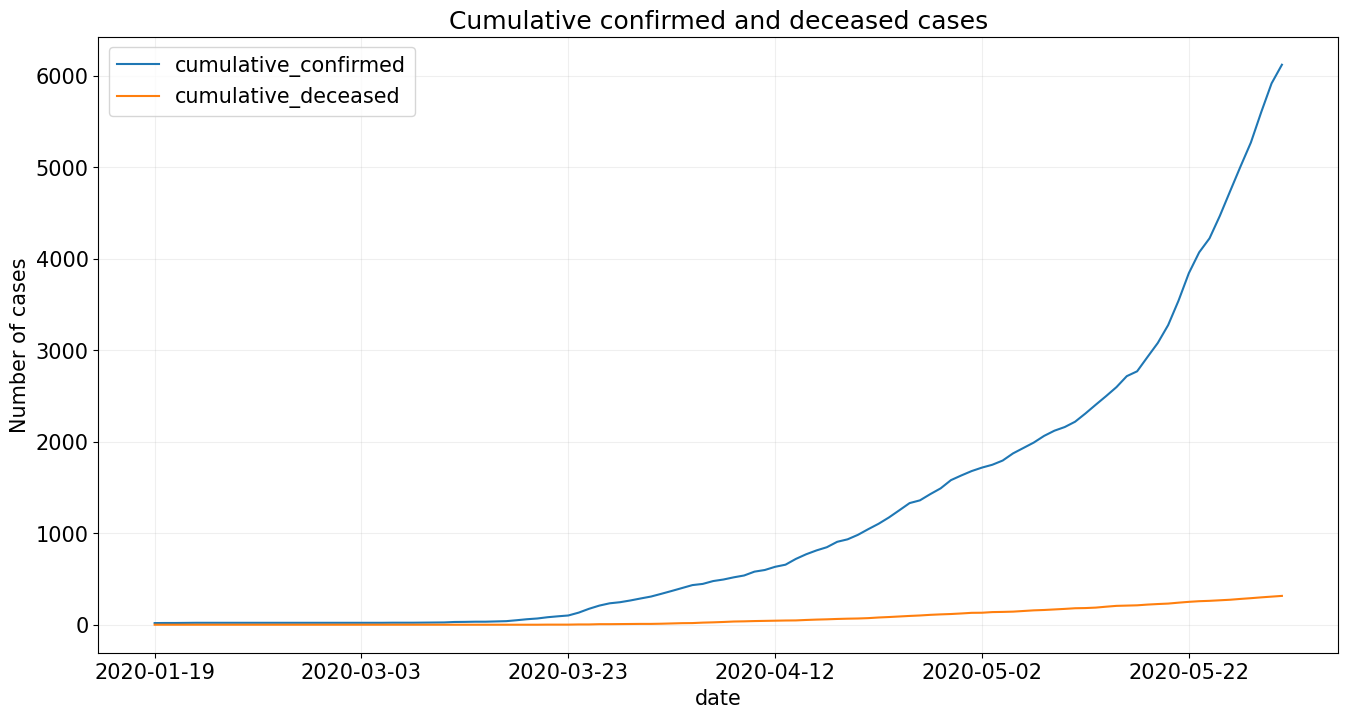

In [29]:
cols = ['cumulative_confirmed', 'cumulative_deceased']

# Get data only for the columns we care about
df = df[cols]

# Get data only for the selected dates
df = df[df.index <= date_limit]

# Get data only after the outbreak begun
df = df[get_outbreak_mask(df)]
df.plot(figsize=(16, 8))
plt.title('Cumulative confirmed and deceased cases')
plt.ylabel('Number of cases')
plt.grid(alpha=.2)

# **Part 3**:Mobility

In [43]:
data_key = 'AR_B'
date_limit = '2020-04-30'
df = pd.read_csv(f'https://storage.googleapis.com/covid19-open-data/v3/location/{data_key}.csv').set_index('date')

In [44]:
df.columns

Index(['location_key', 'place_id', 'wikidata_id', 'country_code',
       'country_name', 'subregion1_code', 'subregion1_name',
       'iso_3166_1_alpha_2', 'iso_3166_1_alpha_3', 'aggregation_level',
       ...
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'snowfall_mm', 'dew_point', 'relative_humidity'],
      dtype='object', length=186)

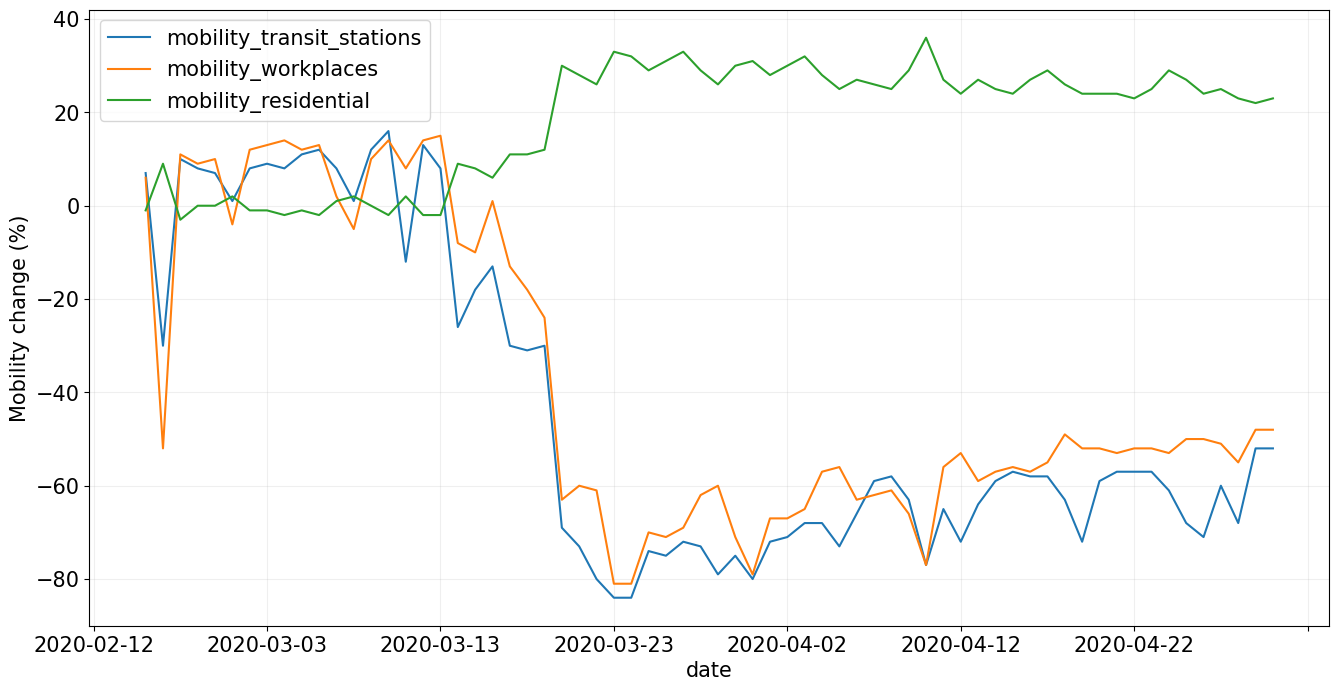

In [47]:
cols = ['cumulative_confirmed', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential']

# Get data only for the columns we care about
df = df[cols]

# Get data only for the selected dates
df = df[df.index <= date_limit]

# Get data only after the outbreak begun
df = df[get_outbreak_mask(df)]

#plot only the mobility data
df.drop('cumulative_confirmed', axis=1).plot(figsize=(16, 8))

plt.ylabel('Mobility change (%)')
plt.grid(alpha=.2)

# **Part 4**:Other Variables

In [58]:
data_key = 'AR_B'
date_limit = '2020-04-30'
df = pd.read_csv(f'https://storage.googleapis.com/covid19-open-data/v3/location/{data_key}.csv')

In [59]:
# prompt: make date a number starting from the first day in the dataframe

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'] - df['date'].min()
df['date'] = df['date'] / pd.Timedelta('1 day')

In [60]:
cols = ['date','cumulative_confirmed','new_confirmed', 'mobility_transit_stations', 'mobility_workplaces', 'mobility_residential']

cols_short = ['date','new_confirmed', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential']

# Get data only for the columns we care about
df = df[cols]

# Get data only after the outbreak begun
df = df[get_outbreak_mask(df)]
df=df[cols]
df=df.set_index('date')

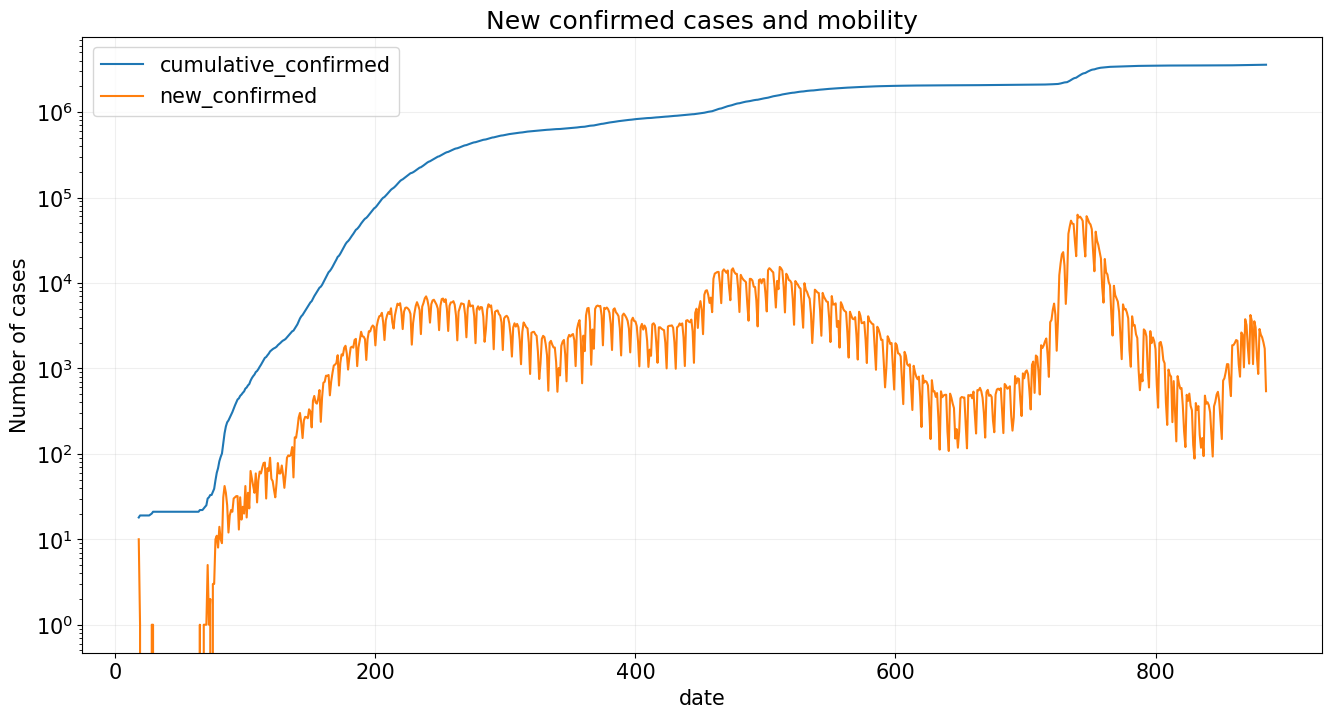

In [62]:
#plot only cumulative confirmed and new confirmed cases
df.drop(['mobility_transit_stations', 'mobility_workplaces', 'mobility_residential'], axis=1).plot(figsize=(16, 8))

plt.yscale('log')

plt.title('New confirmed cases and mobility')
plt.ylabel('Number of cases')
plt.grid(alpha=.2)
